# Circuit library demo

In [ ]:
from qiskit.circuit.library import ...

### Chemistry example: VQE

In [1]:
# simulator
from qiskit import Aer

# the actual algorithm
from qiskit.aqua.algorithms import VQE

# for representation of the H2 molecule
from qiskit.aqua.operators import WeightedPauliOperator

# optimizer for the variational algorithm
from qiskit.aqua.components.optimizers import SLSQP

In [2]:
# building the qubit operator for the H2 molecule
h2_hamiltonian = {
    'paulis': [{"coeff": {"imag": 0.0, "real": -1.052373245772859}, "label": "II"},
               {"coeff": {"imag": 0.0, "real": 0.39793742484318045}, "label": "IZ"},
               {"coeff": {"imag": 0.0, "real": -0.39793742484318045}, "label": "ZI"},
               {"coeff": {"imag": 0.0, "real": -0.01128010425623538}, "label": "ZZ"},
               {"coeff": {"imag": 0.0, "real": 0.18093119978423156}, "label": "XX"}
               ]
}
h2_qubit_operator = WeightedPauliOperator.from_dict(h2_hamiltonian)

# defining the backend for the simulation
backend = Aer.get_backend('statevector_simulator')

# defining the numerical optimizer
optimizer = SLSQP()

The algorithm uses a "guess" or "Ansatz" wavefunction: this comes from our circuit library.

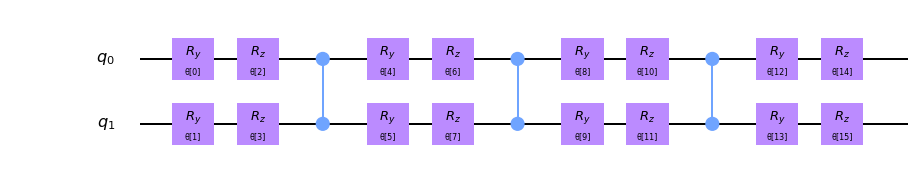

In [3]:
from qiskit.circuit.library import RYRZ  # Kandala et al., Nature Cover 
varform = RYRZ(h2_qubit_operator.num_qubits)
varform.draw(scale=1, output='mpl')

In [10]:
# run the algorithm
algo = VQE(h2_qubit_operator, varform, optimizer=optimizer, quantum_instance=backend)
result = algo.compute_minimum_eigenvalue()

In [11]:
print('Energy:', result['eigenvalue'].real)
print('Optimal parameters:', result['optimal_point'])

Energy: -1.8369679711094058
Optimal parameters: [-3.47892620e-04 -1.24260320e+00 -3.09626868e+00  2.97334616e+00
 -9.01117678e-01 -1.35506167e-04  1.24264727e+00 -2.24067245e+00]


Plug-n-play: circuit library has plentiful options, e.g. `TwoLocal`, `NLocal`, `RY`, ... .

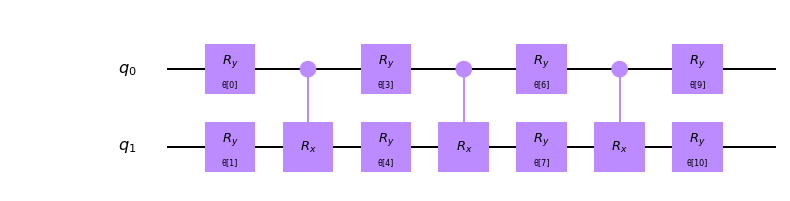

In [9]:
from qiskit.circuit.library import TwoLocal

# easy to implement all efficient 2-local circuits, e.g. all of Alan Aspuru-Guzik's Paper
varform = TwoLocal(h2_qubit_operator.num_qubits, 
                    rotation_blocks='ry',
                    entanglement_blocks='crx',
                    entanglement='linear', 
                    reps=3)
varform.draw(scale=1.2, output='mpl')

In [13]:
algo = VQE(h2_qubit_operator, varform, optimizer=SLSQP(), quantum_instance=backend)
result = algo.compute_minimum_eigenvalue()

In [14]:
print('Energy:', result['eigenvalue'].real)
print('Optimal parameters:', result['optimal_point'])

Energy: -1.8572749123347887
Optimal parameters: [ 4.11779398  2.09875907 -2.64488942  5.26592202  2.004999    4.01549089
  2.27335589  4.847305   -3.34533421  3.91904872 -5.89802565]


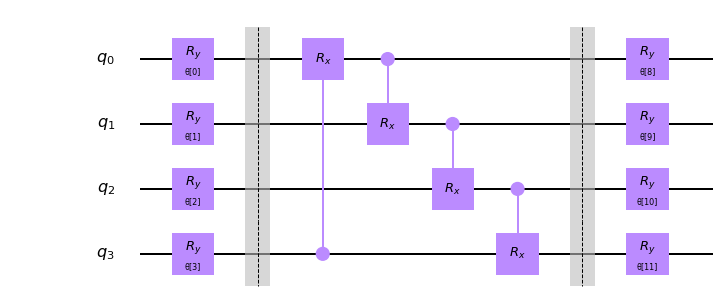

In [11]:
varform.num_qubits = 4
varform.reps = 1
varform.insert_barriers = True
varform.entanglement = 'circular'
varform.rotation_gates = ['z', 'ry']
varform.draw(scale=1, output='mpl')

### Machine learning example: VQC

In [4]:
# the algorithm
from qiskit.aqua.algorithms import VQC

# the training and test data
from sample import training_data, test_data, feature_dimension

In [5]:
# fix the random seeds
from qiskit.aqua import aqua_globals
from numpy import random

aqua_globals.seed = 373
random.seed = 53
seed_simulator, seed_transpiler = 981, 74

In [6]:
from qiskit.circuit.library import SecondOrderExpansion
feature_map = SecondOrderExpansion(feature_dimension=feature_dimension, depth=2)  # Havlicek et al., Nature Cover

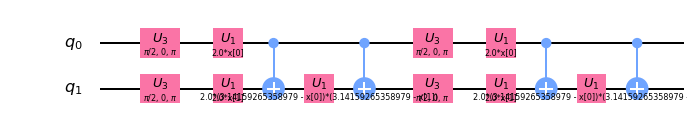

In [7]:
feature_map.draw(putput='mpl')

In [8]:
varform = RYRZ(num_qubits=feature_map.num_qubits, reps=2)

In [14]:
vqc = VQC(optimizer, feature_map, varform, training_data, test_data)
result = vqc.run(backend, seed_simulator=seed_simulator, seed_transpiler=seed_transpiler)

In [15]:
print('Training loss:', result['training_loss'])
print('Test loss:', result['testing_loss'])

Training loss: 0.295080504739488
Test loss: 0.4863865293292629


In [9]:
from qiskit.circuit.library import QFT

In [14]:
varform = QFT(2) + RYRZ(2, reps=2)

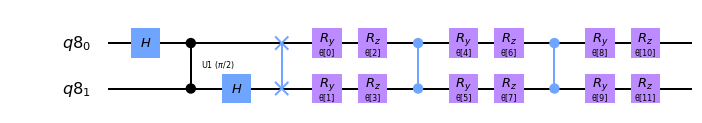

In [13]:
varform.draw(output='mpl')

In [19]:
vqc = VQC(optimizer, feature_map, varform, training_data, test_data)
result = vqc.run(backend, seed_simulator=seed_simulator, seed_transpiler=seed_transpiler)

In [20]:
print('Training loss:', result['training_loss'])
print('Test loss:', result['testing_loss'])

Training loss: 0.2514647782705993
Test loss: 1.430601507930052
